# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [6]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
!ls

01-Animals.ipynb      animals.csv           richpeople.xlsx
02-Billionaires.ipynb billionaires.json


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [4]:
pd.read_excel('richpeople.xlsx')
df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [12]:
len(df.index)

1653

In [13]:
len(df.columns)

30

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [15]:
df.sort_values(by = "networthusbillion",ascending = False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [16]:
df['gender'].value_counts()

gender
male      1473
female     180
Name: count, dtype: int64

## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [40]:
(df['gender'] == 'female').mean()

0.1088929219600726

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [20]:
df.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5a) What is the most common source/type of wealth?

In [21]:
df['selfmade'].value_counts()

selfmade
self-made    1146
inherited     505
Name: count, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [13]:
df[(df['gender'] == 'female') & (df['selfmade'] == 'inherited')]

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
5,2014,Abigail Johnson,50,United States,USA,17.3,inherited,inherited,female,52.0,...,relation,1946.0,NaN,money management,3rd generation,no male siblings,"http://en.wikipedia.org/wiki/Edward_Johnson,_III",https://www.fidelity.com/about-fidelity/our-he...,NaN,NaN
9,2014,Aerin Lauder Zinterhofer,1465,United States,USA,1.1,inherited,inherited,female,44.0,...,relation,1946.0,NaN,"inherited, cosmetics",3rd generation,NaN,http://en.wikipedia.org/wiki/Jane_Lauder,http://investing.businessweek.com/research/sto...,NaN,NaN
12,2014,Ahsen Ozokur,1143,Turkey,TUR,1.6,inherited,inherited,female,63.0,...,relation,1944.0,NaN,food manufacturing,inherited from father,shareholder,http://en.wikipedia.org/wiki/%C3%9Clker,http://www.yildizholding.com.tr/tr/hakkimizda,NaN,NaN
52,2014,Alexandra Schorghuber,609,Germany,DEU,2.8,inherited,inherited,female,55.0,...,relation,1954.0,NaN,real estate,widow,NaN,http://de.wikipedia.org/wiki/Sch%C3%B6rghuber_...,http://de.wikipedia.org/wiki/Alexandra_Sch%C3%...,http://www.sug-munich.com/de/unternehmensgrupp...,NaN
67,2014,Alice Walton,13,United States,USA,34.3,inherited,inherited,female,64.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/nancy-walton-lau...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2014,Wilma Tisch,1203,United States,USA,1.5,inherited,inherited,female,86.0,...,relation,1946.0,NaN,diversified,widow,NaN,http://www.forbes.com/profile/wilma-tisch/,NaN,NaN,NaN
1588,2014,Winnie Johnson-Marquart,551,United States,USA,3.0,inherited,inherited,female,54.0,...,relation,1886.0,NaN,cleaning products,5th generation,NaN,http://en.wikipedia.org/wiki/Herbert_Fisk_John...,http://www.forbes.com/profile/h-fisk-johnson/,http://www.scjohnson.com/en/company/history.aspx,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,relation,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN
1618,2014,Yoshiko Mori,1210,Japan,JPN,1.4,inherited,inherited,female,73.0,...,relation,1959.0,NaN,"inherited, Mori Building",widow,NaN,http://www.forbes.com/profile/yoshiko-mori/,NaN,NaN,NaN


In [8]:
(df[df['gender'] == 'female']['selfmade'] == 'self-made').mean() * 100

5       False
9       False
12      False
52      False
67      False
        ...  
1603     True
1607    False
1618    False
1627    False
1638     True
Name: selfmade, Length: 180, dtype: bool

In [27]:
(df[df['gender'] == 'male']['selfmade'] == 'self-made').mean() * 100

75.22063815342838

## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [28]:
df['sourceofwealth'].value_counts().head()

sourceofwealth
real estate        107
diversified         69
retail              63
investments         60
pharmaceuticals     42
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='sourceofwealth'>

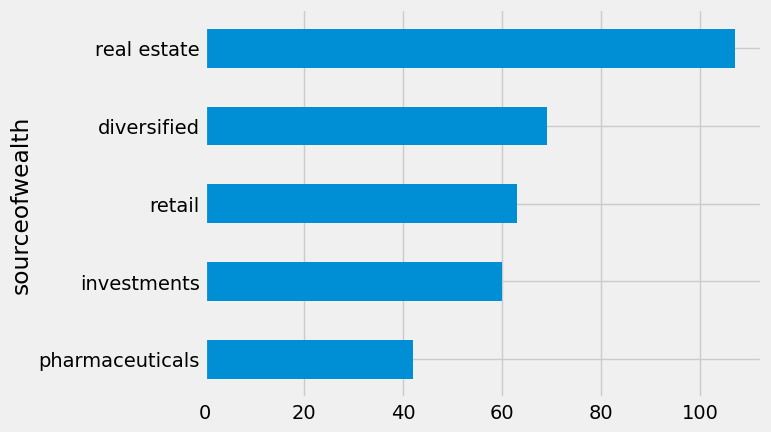

In [15]:
df['sourceofwealth'].value_counts().head().sort_values(ascending = True).plot(kind = "barh")                                                        

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

In [33]:
df[df['sector'].isin(['retail', 'real estate', 'diversified', 'investments', 'pharmaceuticals'])]['networthusbillion'].sum()

875.5999999999999

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [37]:
df.groupby('countrycode')['networthusbillion'].sum().sort_values(ascending = False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [41]:
df['age'].mean()

63.34213836477988

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [42]:
df[df['selfmade'] == 'self-made']['age'].mean()

62.62589928057554

In [43]:
df[df['selfmade'] == 'inherited']['age'].mean()

64.96218487394958

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [51]:
df.sort_values(by = ['age'], ascending = False, na_position='last').head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN


In [52]:
df.sort_values(by = ['age'], ascending = True, na_position='last').head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<Axes: >

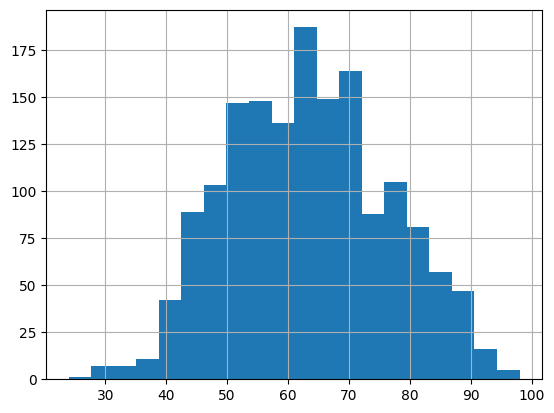

In [58]:
df["age"].hist(bins=20)

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

Text(0.5, 1.0, 'Net Worth Compared to Age')

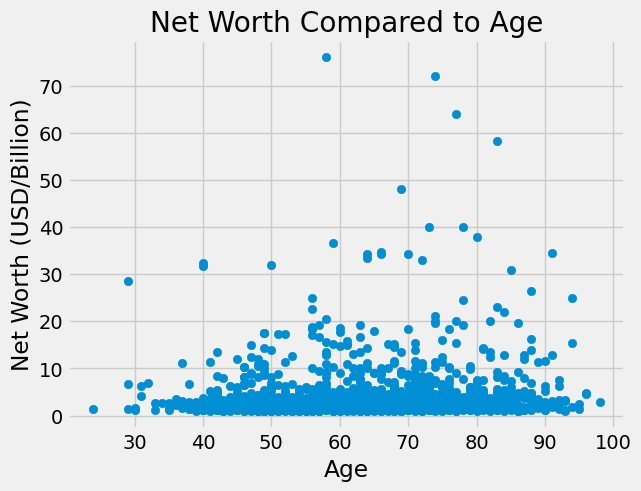

In [66]:
plt.scatter(df['age'],df['networthusbillion'])
plt.xlabel('Age')
plt.ylabel('Net Worth (USD/Billion)')
plt.title('Net Worth Compared to Age')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

Text(0.5, 1.0, 'Meet the 10 Richest People in the World')

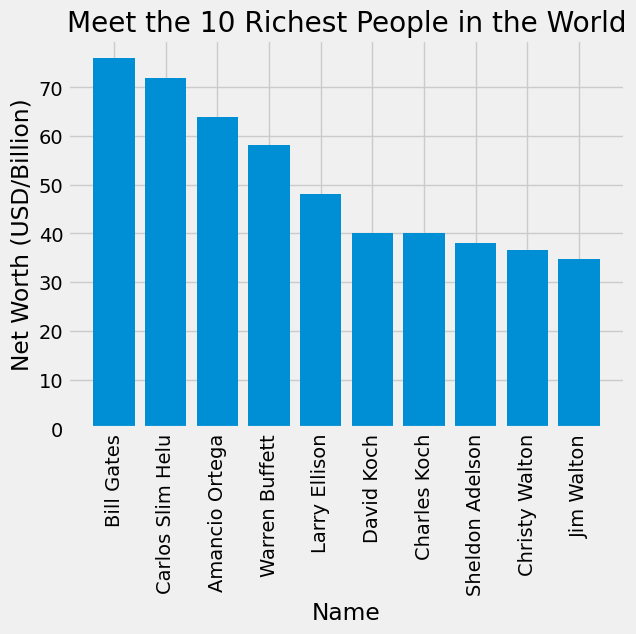

In [85]:
rich_10 = df.sort_values(by = ['networthusbillion'], ascending = False, na_position='last').head(10)
plt.bar(rich_10['name'],rich_10['networthusbillion'])
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Net Worth (USD/Billion)')
plt.title('Meet the 10 Richest People in the World')

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [86]:
pd.read_json('billionaires.json')

,commonName,commonLastName,citizenship,slug,industry,personId,rank,worth,lastChange,lastPercentChange,ytdChange,ytdPercentChange,sector,fWorth,fLastChange,fYtdChange,fLastPercentChange,fYtdPercentChange
0,Elon Musk,Musk,United States,elon-r-musk,Technology,1954518,1,221116780866,9795811154,4.64,84106712938,61.39,Technology,$221B,+$9.80B,+$84.1B,+4.6%,+61.4%
1,Bernard Arnault,Arnault,France,bernard-j-arnault,Consumer,1392853,2,170267873036,7356040557,4.52,8178459368,5.05,Consumer,$170B,+$7.36B,+$8.18B,+4.5%,+5.0%
2,Jeff Bezos,Bezos,United States,jeffrey-p-bezos,Technology,1642252,3,169556171871,3202661603,1.93,62599942079,58.53,Technology,$170B,+$3.20B,+$62.6B,+1.9%,+58.5%
3,Bill Gates,Gates,United States,william-h-gates,Technology,1390479,4,131137012631,1103482475,0.85,21900118029,20.05,Technology,$131B,+$1.10B,+$21.9B,+0.8%,+20.1%
4,Larry Ellison,Ellison,United States,lawrence-j-ellison,Technology,1491757,5,129608081535,2286642464,1.80,37780140594,41.14,Technology,$130B,+$2.29B,+$37.8B,+1.8%,+41.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Sofie Kirk Kristiansen,Kristiansen,Denmark,sofie-kirk-k-kristiansen,Consumer,17992920,496,5145062341,33748968,0.66,-292738682,-5.38,Consumer,$5.15B,+$33.7M,-$293M,+0.7%,-5.4%
496,Frits Goldschmeding,Goldschmeding,Netherlands,frits-j-goldschmeding,Retail,3368283,497,5136282642,154239727,3.10,-7773499,-0.15,Retail,$5.14B,+$154M,-$7.77M,+3.1%,-0.1%
497,Austen Cargill,Cargill,United States,austen-s-cargill,Commodities,1878644,498,5132489050,0,0.00,38448500,0.75,Commodities,$5.13B,$0,+$38.4M,0%,+0.8%
498,John Reece,Reece,United Kingdom,john-reece,Industrial,18070530,499,5125353358,0,0.00,1839914334,56.00,Industrial,$5.13B,$0,+$1.84B,0%,+56.0%
